In [50]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#### Задача 1

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов:

football_players = [173, 175, 180, 178, 177, 185, 183, 182]
hockey_players = [177, 179, 180, 188, 177, 172, 171, 184, 180]
lifters = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]

In [51]:
y1 = np.array([173, 175, 180, 178, 177, 185, 183, 182])
y2 = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
y3 = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])
y = np.concatenate([y1, y2, y3])

In [52]:
n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]
n = y.shape[0]

In [53]:
S2_b = n1 * (y1.mean() - y.mean()) ** 2 + n2 * (y2.mean() - y.mean()) ** 2 + n3 * (y3.mean() - y.mean()) ** 2
S2_w = ((y1 - y1.mean()) ** 2).sum() + ((y2 - y2.mean()) ** 2).sum() + ((y3 - y3.mean()) ** 2).sum()
S2 = ((y - y.mean()) ** 2).sum()

S2_b, S2_w, S2

(253.9074675324678, 577.0568181818182, 830.9642857142854)

In [54]:
k = 3

k1 = k - 1
k2 = n - k

sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

F_h = sigma2_b / sigma2_w
F_h

5.500053450812598

In [55]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.3851899614491687

In [56]:
F_h > F_crit

True

Различие среднего роста спортсменов по видам спорта является статистически значимым.

In [57]:
stats.f_oneway(y1, y2, y3)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

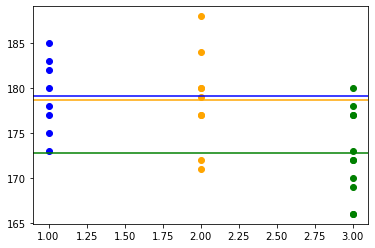

In [59]:
plt.scatter(1 * (y1 / y1), y1, color='blue')
plt.axhline(y=y1.mean(), color='blue')
plt.scatter(2 * (y2 / y2), y2, color='orange')
plt.axhline(y=y2.mean(), color='orange')
plt.scatter(3 * (y3 / y3), y3, color='green')
plt.axhline(y=y3.mean(), color='green')

plt.show()